# Дипломная работа по курсу Python

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Требуется выполнить следующие задания:


### Задание 1. 
Загрузите файл HR.csv в pandas dataframe

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats

In [2]:
url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
hr = pd.read_csv(url)

In [3]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Датафрейм не содержит пропусков

Количественные атрибуты:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах

Категориальные атрибуты с бинарной логикой (0-нет, 1-да):\
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником\
7. left - уволился ли сотрудник\
8. promotion_last_5years - повышался ли сотрудник за последние пять лет\

Категориальные атрибуты с выделенными категорями\
9. department - отдел в котором работает сотрудник\
10. salary - относительный уровень зарплаты\

### Задание 2 
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).


Поскольку основные статистики актуальны только для количественных атрибутов, выберем их

In [5]:
hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


*медиана равна 50 процентилю

Поскольку мода актуальна и для категориальных атрибутов, рассчитаем моду для всего датафрейма

In [6]:
hr.mode().iloc[0]

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

### Задание 3 
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.


Рассчитаем корреляционную матрицу для количественных переменных

In [16]:
hr_corr = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
hr_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:title={'center':'Корреляция матрица для количественных переменных'}>

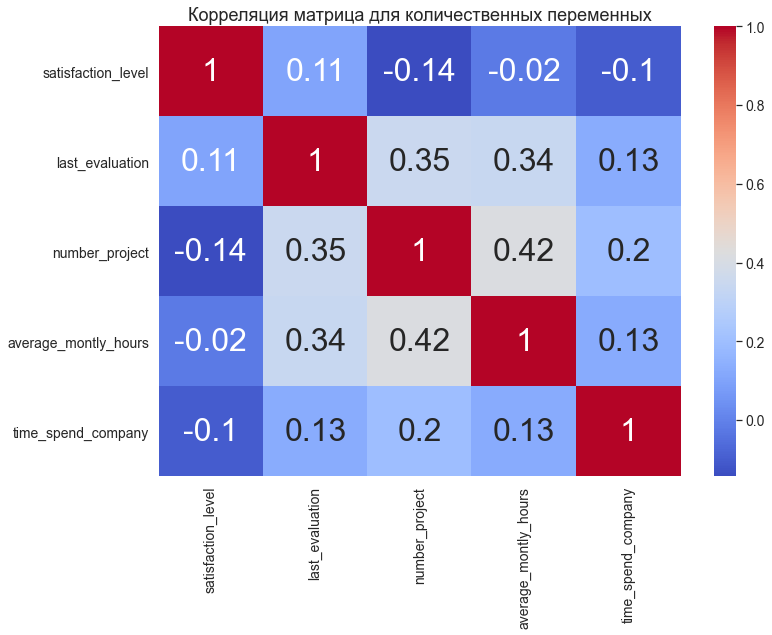

In [129]:
# построем тепловую карту на основе корреляционной матрицы
sns.set(rc={'figure.figsize':(11.7, 8.28)})
plt.rc('axes', titlesize=18) # размер шрифта для этого и последующих графиков
plt.rc('axes', labelsize=14) # размер шрифта для этого и последующих графиков
plt.rc('xtick',labelsize=14) # размер шрифта для этого и последующих графиков
plt.rc('ytick',labelsize=14) # размер шрифта для этого и последующих графиков
plt.title('Корреляция матрица для количественных переменных')
sns.heatmap(hr_corr, annot=True, cmap='coolwarm', annot_kws={'size':32})

Наиболее скоррелированные переменные\
3. number_projects - Количество проектов, выполненных за время работы\
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц

хотя коэффициент корреляции для этих переменных невысок - 0,42 - средняя прямая корреляция

### Задание 4 
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [130]:
hr_dept = hr[['department', 'salary']].groupby('department').agg({'salary': 'count'}).rename(columns={'salary':'employee'}).sort_values(by=['employee'], ascending=False)
hr_dept

,employee
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


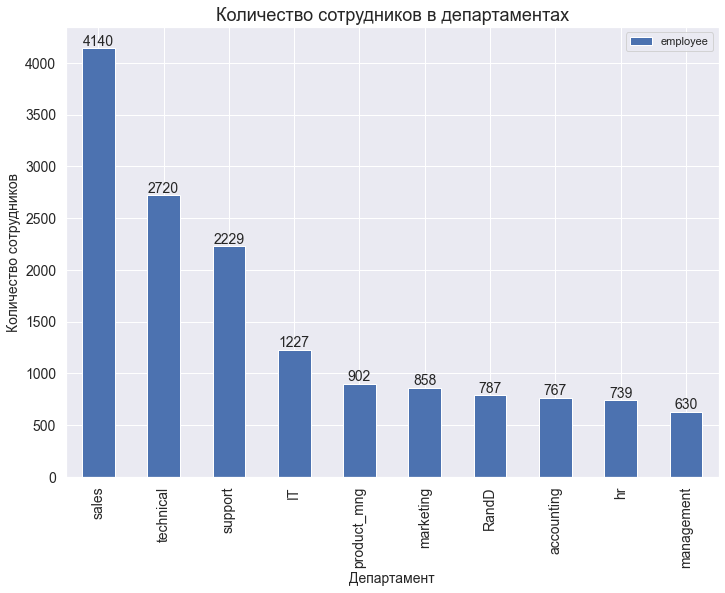

In [131]:
hr_dept.plot(kind='bar', 
             title='Количество сотрудников в департаментах',
             xlabel='Департамент',
             ylabel='Количество сотрудников')

for i, val in enumerate(hr_dept.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

### Задание 5
Показать распределение сотрудников по зарплатам.

In [132]:
hr_salg = hr[['salary', 'department']].groupby('salary').agg({'department': 'count'}).rename(columns={'department':'salgary_count'}).sort_values(by=['salgary_count'], ascending=False)
hr_salg

,salgary_count
salary,
low,7316
medium,6446
high,1237


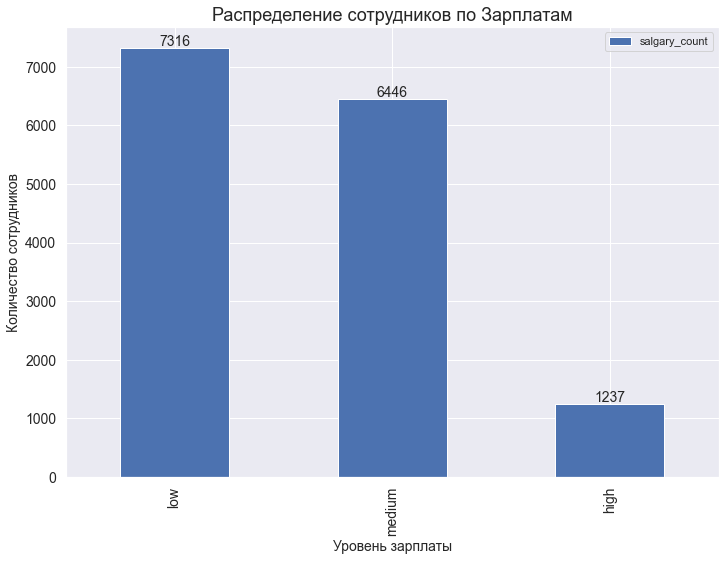

In [133]:
hr_salg.plot(kind='bar', 
             title='Распределение сотрудников по Зарплатам',
             xlabel='Уровень зарплаты',
             ylabel='Количество сотрудников')

for i, val in enumerate(hr_salg.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

### Задание 6.
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [134]:
hr_salg_dep = hr[['salary', 'department', 'promotion_last_5years']].groupby(['salary', 'department']).agg({'promotion_last_5years': 'count'}).rename(columns={'promotion_last_5years':'salgary_count_dep'}).sort_values(by=['salary', 'salgary_count_dep'], ascending=False)
hr_salg_dep

salgary_count_dep
salary department                    
medium sales                     1772
       technical                 1147
       support                    942
       IT                         535
       product_mng                383
       marketing                  376
       RandD                      372
       hr                         359
       accounting                 335
       management                 225
low    sales                     2099
       technical                 1372
       support                   1146
       IT                         609
       product_mng                451
       marketing                  402
       RandD                      364
       accounting                 358
       hr                         335
       management                 180
high   sales                      269
       management                 225
       technical                  201
       support                    141
       IT                          83
       marketing                   80
       accounting                  74
       product_mng                 68
       RandD                       51
       hr                          45

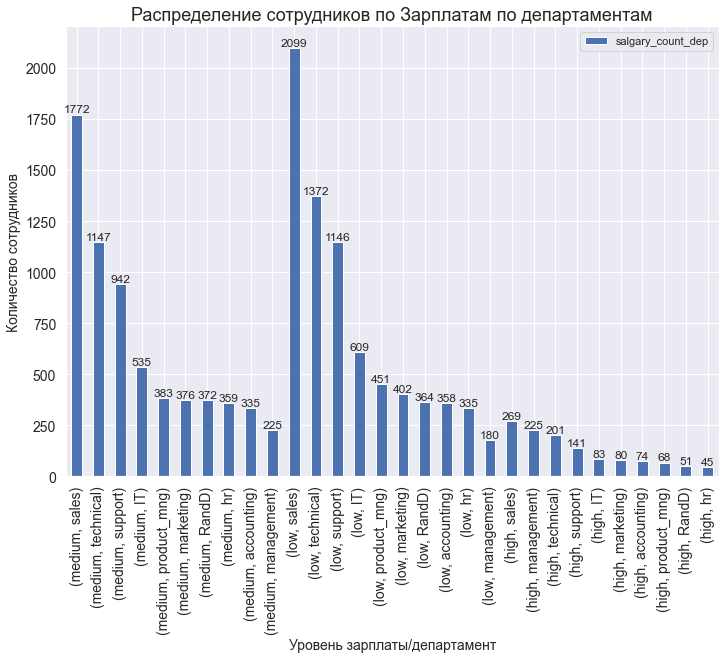

In [135]:
hr_salg_dep.plot(kind='bar', 
                 title='Распределение сотрудников по Зарплатам по департаментам',
                 xlabel='Уровень зарплаты/департамент',
                 ylabel='Количество сотрудников')

for i, val in enumerate(hr_salg_dep.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

In [136]:
hr_salg_dep = hr[['department', 'salary', 'promotion_last_5years']].groupby(['department', 'salary']).agg({'promotion_last_5years': 'count'}).rename(columns={'promotion_last_5years':'salgary_count_dep'})
hr_salg_dep

salgary_count_dep
department  salary                   
IT          high                   83
            low                   609
            medium                535
RandD       high                   51
            low                   364
            medium                372
accounting  high                   74
            low                   358
            medium                335
hr          high                   45
            low                   335
            medium                359
management  high                  225
            low                   180
            medium                225
marketing   high                   80
            low                   402
            medium                376
product_mng high                   68
            low                   451
            medium                383
sales       high                  269
            low                  2099
            medium               1772
support     high                  141
            low                  1146
            medium                942
technical   high                  201
            low                  1372
            medium               1147

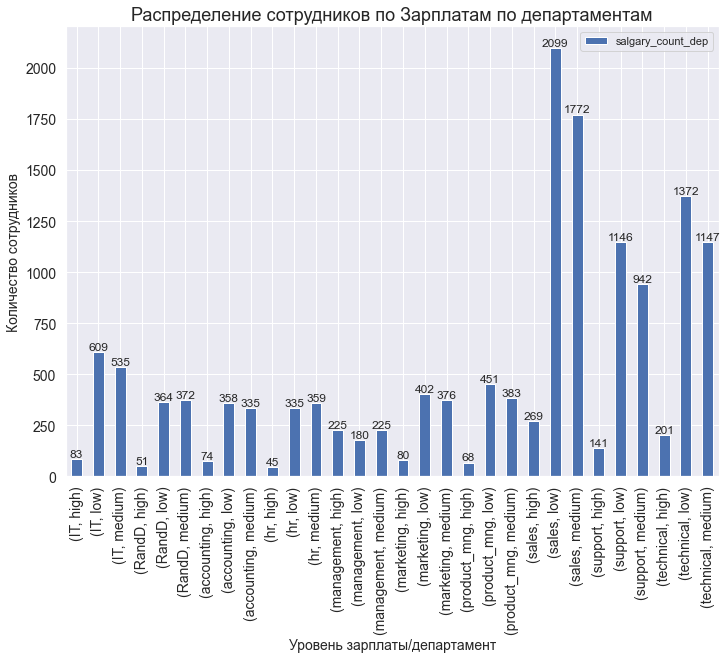

In [137]:
hr_salg_dep.plot(kind='bar', 
                 title='Распределение сотрудников по Зарплатам по департаментам',
                 xlabel='Уровень зарплаты/департамент',
                 ylabel='Количество сотрудников')

for i, val in enumerate(hr_salg_dep.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

### Задание 7 
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [138]:
# выборка среднего количество часов на рабочем месте в месяц для сотрудников с низкой зарплатой
hr_sal_low = np.array(hr[ hr['salary'] == 'low'][['average_montly_hours']])[:,0]
len(hr_sal_low)

7316

In [139]:
# выборка среднего количество часов на рабочем месте в месяц для сотрудников с высокой зарплатой
hr_sal_high = np.array(hr[ hr['salary'] == 'high'][['average_montly_hours']])[:,0]
len(hr_sal_high)

1237

Гипотеза H0 - среднее время на работе не зависит от уровня зарплаты (выборки не имеют стат. значимых различий)\
Альтернативная гипотеза H1 - среднее время на работе зависит от уровня зарплаты (выборки имеют стат. значимые различия)

In [140]:
hr_sal_low.var() / hr_sal_high.var()

1.1359075151487161

Отношение дисперсий выборок близко менее 4, предполагаем, что дисперсии равны

In [141]:
stat, p = stats.ttest_ind(hr_sal_low, hr_sal_high)

Принимаем уровень значимости 0,05

In [142]:
p

0.4661023478267259

p-value существенно выше уровня значимости,

следовательно оснований отвергать нулевую гипотезу (H0) нет

### Задание 8
Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):\
● Доля сотрудников с повышением за последние 5 лет\
● Средняя степень удовлетворенности\
● Среднее количество проектов

In [143]:
# выборка - уволившиеся сотрудники
hr_left = hr[ hr['left'] == 1][['satisfaction_level', 'number_project', 'promotion_last_5years']]
hr_left

,satisfaction_level,number_project,promotion_last_5years
0,0.38,2,0
1,0.80,5,0
2,0.11,7,0
3,0.72,5,0
4,0.37,2,0
...,...,...,...
14994,0.40,2,0
14995,0.37,2,0
14996,0.37,2,0
14997,0.11,6,0


In [144]:
# Доля сотрудников с повышением за последние 5 лет
print('Доля сотрудников, у которых за последние 5 лет было повышение (для уволившихся сотрудников) составляет', 
      round(len(hr_left[ hr_left['promotion_last_5years'] == 1 ]) *100 / len(hr_left), 2),
      '%')

Доля сотрудников, у которых за последние 5 лет было повышение (для уволившихся сотрудников) составляет 0.53 %


In [145]:
# Средняя степень удовлетворенности
print('Средняя степень удовлетворенности сотрудников (для уволившихся сотрудников) составляет',
      round(hr_left['satisfaction_level'].mean(), 2)
      )

Средняя степень удовлетворенности сотрудников (для уволившихся сотрудников) составляет 0.44


In [146]:
# Среднее количество проектов
print('Среднее количество проектов (для уволившихся сотрудников) составляет',
      round(hr_left['number_project'].mean(), 2)
      )

Среднее количество проектов (для уволившихся сотрудников) составляет 3.86


In [147]:
# выборка - не уволившиеся сотрудники
hr_no_left = hr[ hr['left'] == 0][['satisfaction_level', 'number_project', 'promotion_last_5years']]
hr_no_left

,satisfaction_level,number_project,promotion_last_5years
2000,0.58,4,0
2001,0.82,2,0
2002,0.45,5,0
2003,0.78,5,0
2004,0.49,3,0
...,...,...,...
14206,0.90,3,1
14207,0.74,5,1
14208,0.85,3,1
14209,0.33,3,1


In [148]:
# Доля сотрудников с повышением за последние 5 лет
print('Доля сотрудников, у которых за последние 5 лет было повышение (для не уволившихся сотрудников) составляет', 
      round(len(hr_no_left[ hr_no_left['promotion_last_5years'] == 1 ]) *100 / len(hr_no_left), 2),
      '%')

Доля сотрудников, у которых за последние 5 лет было повышение (для не уволившихся сотрудников) составляет 2.63 %


In [149]:
# Средняя степень удовлетворенности
print('Средняя степень удовлетворенности сотрудников (для не уволившихся сотрудников) составляет',
      round(hr_no_left['satisfaction_level'].mean(), 2)
      )

Средняя степень удовлетворенности сотрудников (для не уволившихся сотрудников) составляет 0.67


In [150]:
# Среднее количество проектов
print('Среднее количество проектов (для не уволившихся сотрудников) составляет',
      round(hr_no_left['number_project'].mean(), 2)
      )

Среднее количество проектов (для не уволившихся сотрудников) составляет 3.79


### Задание 9
Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)\
Оценить качество модели на тестовой выборки

In [151]:
hr_lda = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
              'time_spend_company', 'Work_accident', 'promotion_last_5years']]
hr_class = np.array(hr['left'])

In [152]:
#разделяем датафрейм на тренеровочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(hr_lda, hr_class, random_state=42)

In [153]:
lda = LinearDiscriminantAnalysis()

In [154]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [155]:
# делаем прогноз используя тестовую выборку
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [156]:
# рассчитаем точность модели
accuracy_score(y_test, lda.predict(X_test))

0.7536

Таким образом, при данном разделение на тренеровочную и тестовую выборки получили, что модель предсказыват точно с вероятностью 75,36 %

In [157]:
# коэффициенты модели
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
        -1.10730495e+00]])

Самый большой коэффициент по модулю - первый. Который отвечает за атрибут Уровень удовлетворенности работой. Т.е. этот атрибут оказывает самое большое влияние. Поскольку зависимость обратная, то чем больше Уровень удовлетворенности работой, тем меньше вероятность увольнения.

### Задание 10
Загрузить jupyter notebook с решение на github и прислать ссылку

git add .\
git commit -am "Diplom Python"\
git push origin master